centro de massa na possição: x: 612  y: 399
22858.0
centro de massa na possição: x: 108  y: 133
22854.0


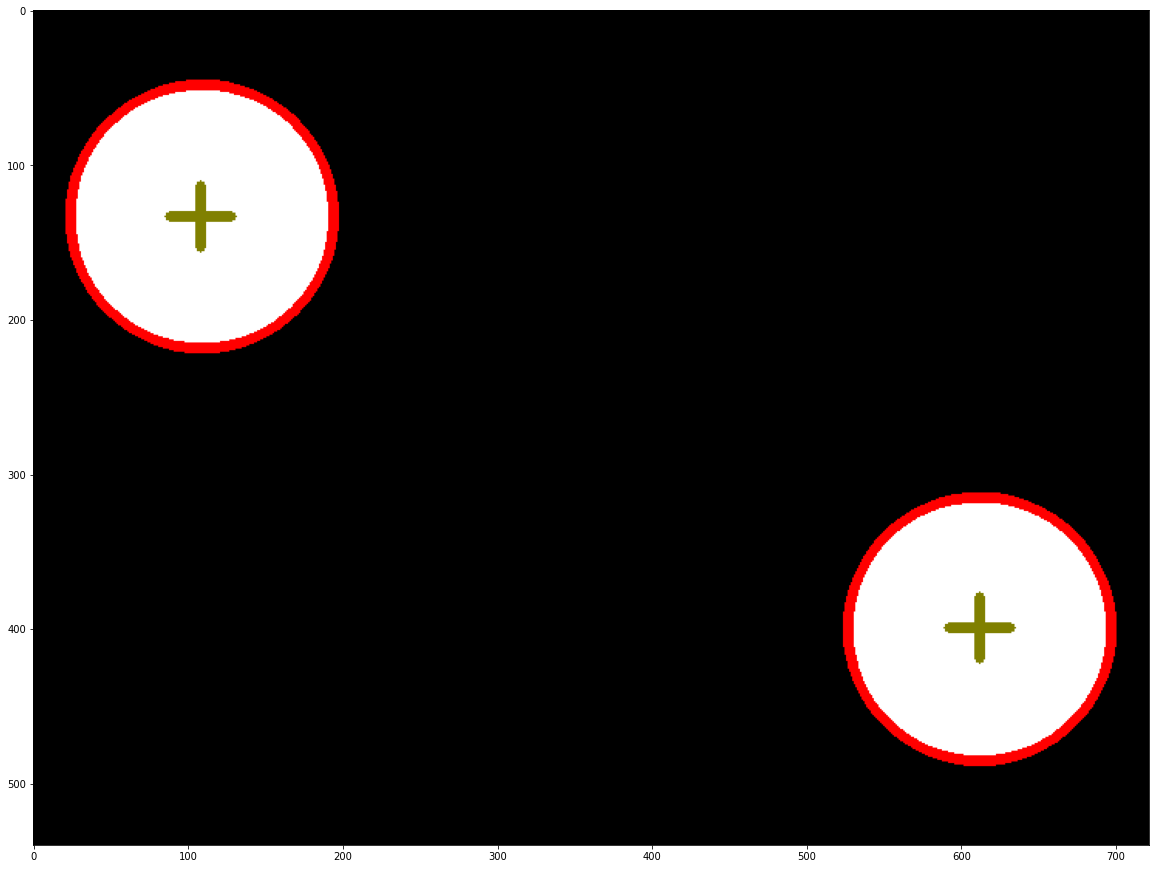

In [3]:
#Implemente seu código

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

# por padrão a imagem é lida em bgr, mas quero ver ela em rgb, por isso eu converto a imagem
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## quero fazer um filtro na imagem para pegar apenas o que for vermelho, pq quero isso.
### primeira coisa converte para hsv
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

image_lower_blue = np.array([50, 50, 50])  
image_upper_blue = np.array([90, 255, 249])

image_lower_reed = np.array([0, 55, 50])  
image_upper_reed = np.array([16, 240, 231])

mask1 = cv2.inRange(img_hsv, image_lower_blue, image_upper_blue)
mask2 = cv2.inRange(img_hsv, image_lower_reed, image_upper_reed)

mask = mask1 + mask2


res = cv2.bitwise_and(img_hsv,img_hsv, mask= mask)


contornos, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);


size = 20
color = (128,128,0)

for cnt in contornos:
    M = cv2.moments(cnt)
    
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    area = cv2.contourArea(cnt)
    if(area >= 22854.0):

      cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
      cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

      print("centro de massa na possição: x:",cx, " y:", cy)
      print(area)

fig = plt.figure(figsize=(20,20))
#plt.subplot(1, 3, 1)
#plt.imshow(img_rgb)
#plt.subplot(1, 3, 2)
#plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)
#plt.subplot(1, 3, 3)
plt.imshow(contornos_img)
plt.show()

